# Recurrent Neural Network

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model

## Code

### Chargement des données

In [2]:
train_data = np.loadtxt('data/ECG200_TRAIN.tsv', delimiter='\t')
test_data = np.loadtxt('data/ECG200_TEST.tsv', delimiter='\t')

### Préparation des données

In [3]:
# Changer -1 en 0 pour la classification binaire
train_data[train_data[:, 0] == -1, 0] = 0
test_data[test_data[:, 0] == -1, 0] = 0

# Séparation des données d'entraînement et de test
X_train, y_train = train_data[:, 1:], train_data[:, 0]
X_test, y_test = test_data[:, 1:], test_data[:, 0]

# Normalisation des séries temporelles entre 0 et 1
global_max = np.max(np.concatenate((X_train, X_test), axis=0))
global_min = np.min(np.concatenate((X_train, X_test), axis=0))
X_train_normalized = (X_train - global_min) / (global_max - global_min)
X_test_normalized = (X_test - global_min) / (global_max - global_min)

# Remodelage les données d'entrée pour qu'elles aient la forme (batch_size, timesteps, features)
timesteps = 1  ## Nombre de pas de temps en fonction de l'application
X_train_reshaped = X_train_normalized.reshape(-1, timesteps, X_train_normalized.shape[1])
X_test_reshaped = X_test_normalized.reshape(-1, timesteps, X_test_normalized.shape[1])

In [4]:
print(train_data.shape)
print(test_data.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_test)

(100, 97)
(100, 97)
(100, 96) (100,)
(100, 96) (100,)
[1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1.]


### Création du modèle RNN (LSTM)

In [5]:
input_shape = (timesteps, X_train_normalized.shape[1])  # Taille de la série temporelle
hidden_units = 8  # Nombre d'unités dans la couche LSTM (not 128 _ best : 16 ?)

input_layer = Input(shape=input_shape)
lstm_layer = LSTM(units=hidden_units)(input_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)  # Classification binaire

model = Model(inputs=input_layer, outputs=output_layer)

### Compilation du modèle

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary

### Entrainement du modèle

In [7]:
mini_batch_size = 32 # (same with 64)
history = model.fit(X_train_reshaped, y_train, batch_size=mini_batch_size, epochs=500, validation_split=0.2)

Epoch 1/500


3/3 [==============================] - 5s 304ms/step - loss: 0.7084 - accuracy: 0.2750 - val_loss: 0.6921 - val_accuracy: 0.4500
Epoch 2/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6886 - accuracy: 0.6500 - val_loss: 0.6881 - val_accuracy: 0.5500
Epoch 3/500
3/3 [==============================] - 0s 30ms/step - loss: 0.6732 - accuracy: 0.7250 - val_loss: 0.6857 - val_accuracy: 0.5500
Epoch 4/500
3/3 [==============================] - 0s 30ms/step - loss: 0.6578 - accuracy: 0.7250 - val_loss: 0.6848 - val_accuracy: 0.5500
Epoch 5/500
3/3 [==============================] - 0s 31ms/step - loss: 0.6451 - accuracy: 0.7250 - val_loss: 0.6851 - val_accuracy: 0.5500
Epoch 6/500
3/3 [==============================] - 0s 27ms/step - loss: 0.6357 - accuracy: 0.7250 - val_loss: 0.6864 - val_accuracy: 0.5500
Epoch 7/500
3/3 [==============================] - 0s 29ms/step - loss: 0.6263 - accuracy: 0.7250 - val_loss: 0.6885 - val_accuracy: 0.5500
Epoch 8/500
3/3 [

### Évaluation du modèle sur les données de test

In [8]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

4/4 [==============================] - 0s 4ms/step - loss: 0.4139 - accuracy: 0.8300
Test Loss: 0.4139486253261566, Test Accuracy: 0.8299999833106995


### Plot

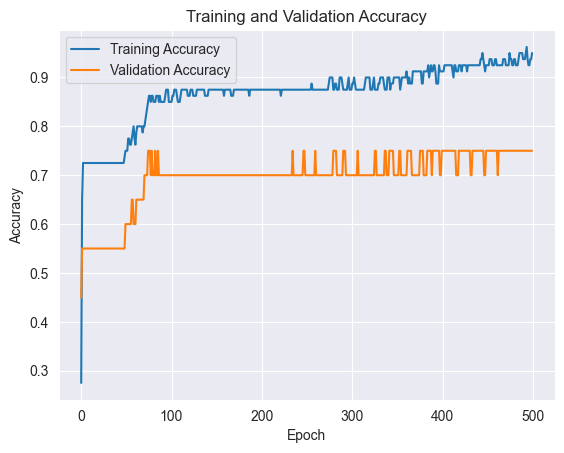

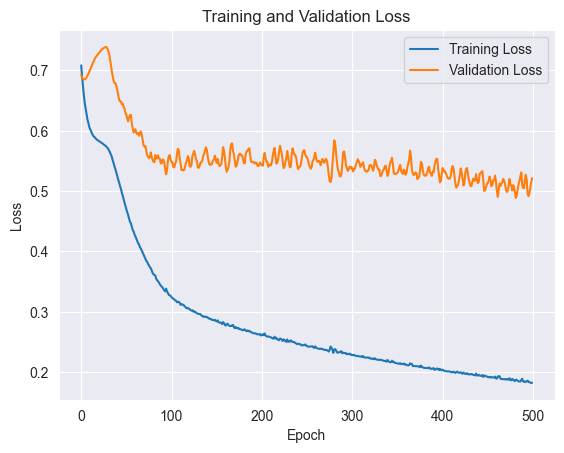

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Matrice de confusion